# Projet IAS Voitures

# Sommaire

## 1. [Prétraitement](#1---Prétraitement)
### 1.1 [Netoyage des donnes](#1.1---Nétoyage-des-données)
### 1.2 [Transformation texte en one hot](#1.2---Transformation-texte-en-one-hot)
### 1.3 [Regrouppement des modèles de voiture](#1.3---Regrouppement-des-modèles-de-voiture)
### 1.4 [Regression linéaire sans standardisation](#1.4-Annexe---Regression-linéaire-sans-standardisation)

## 2. [Standardisation](#2---Standardisation)

## 3. [Modèles](#3---Modèles)
### 3.1 [Régression linéaire](#3.1---Régression-linéaire)
### 3.2 [Random Forest](#3.2---Random-Forest)

## 4. [Analyse](#4---Analyse)

___

#  1 - Prétraitement

### Imports nécessaire

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection
import sklearn.linear_model
import sklearn.preprocessing

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [60]:
cars = pd.read_csv('cars.csv')
cars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.50000,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.00000,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.50000,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.00000,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.50000,...,True,False,True,True,False,False,False,False,True,7


In [61]:
#on supprime les features_x car inutilisables
cars = cars.drop(columns=['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9'], axis=1)
cars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.50000,universal,False,owned,all,10900.00000,False,Минская обл.,9,13,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.00000,universal,False,owned,all,5000.00000,True,Минская обл.,12,54,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.50000,suv,False,owned,all,2800.00000,True,Минская обл.,4,72,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.00000,sedan,False,owned,all,9999.00000,True,Минская обл.,9,42,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.50000,universal,False,owned,all,2134.11000,True,Гомельская обл.,14,7,7


In [62]:
cars.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.00000,38531.00000,38521.00000,38531.00000,38531.00000,38531.00000,38531.00000
mean,248864.63845,2002.94373,2.05516,6639.97102,9.64906,16.30609,80.57725
std,136072.37653,8.06573,0.67118,6428.15202,6.09322,43.28693,112.82657
min,0.00000,1942.00000,0.20000,1.00000,1.00000,1.00000,0.00000
25%,158000.00000,1998.00000,1.60000,2100.00000,5.00000,2.00000,23.00000
50%,250000.00000,2003.00000,2.00000,4800.00000,8.00000,5.00000,59.00000
75%,325000.00000,2009.00000,2.30000,8990.00000,12.00000,16.00000,91.00000
max,1000000.00000,2019.00000,8.00000,50000.00000,86.00000,1861.00000,2232.00000


___

### 1.1 - Nétoyage des données

In [63]:
#On supprime les lignes avec des valeurs nulles
cars = cars.dropna()
#on verifie si il reste des valeurs nulles
cars.isnull().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
price_usd            0
is_exchangeable      0
location_region      0
number_of_photos     0
up_counter           0
duration_listed      0
dtype: int64

In [64]:
#gas et gasoline etant designant la même chose on transforme tous les gas en gasoline
cars['engine_fuel'] = cars['engine_fuel'].replace('gas','gasoline')


# Pour obtenir l'age
cars['age'] = cars['year_produced'].map(lambda x : 2020 - x )
cars = cars.drop(columns=['year_produced'])



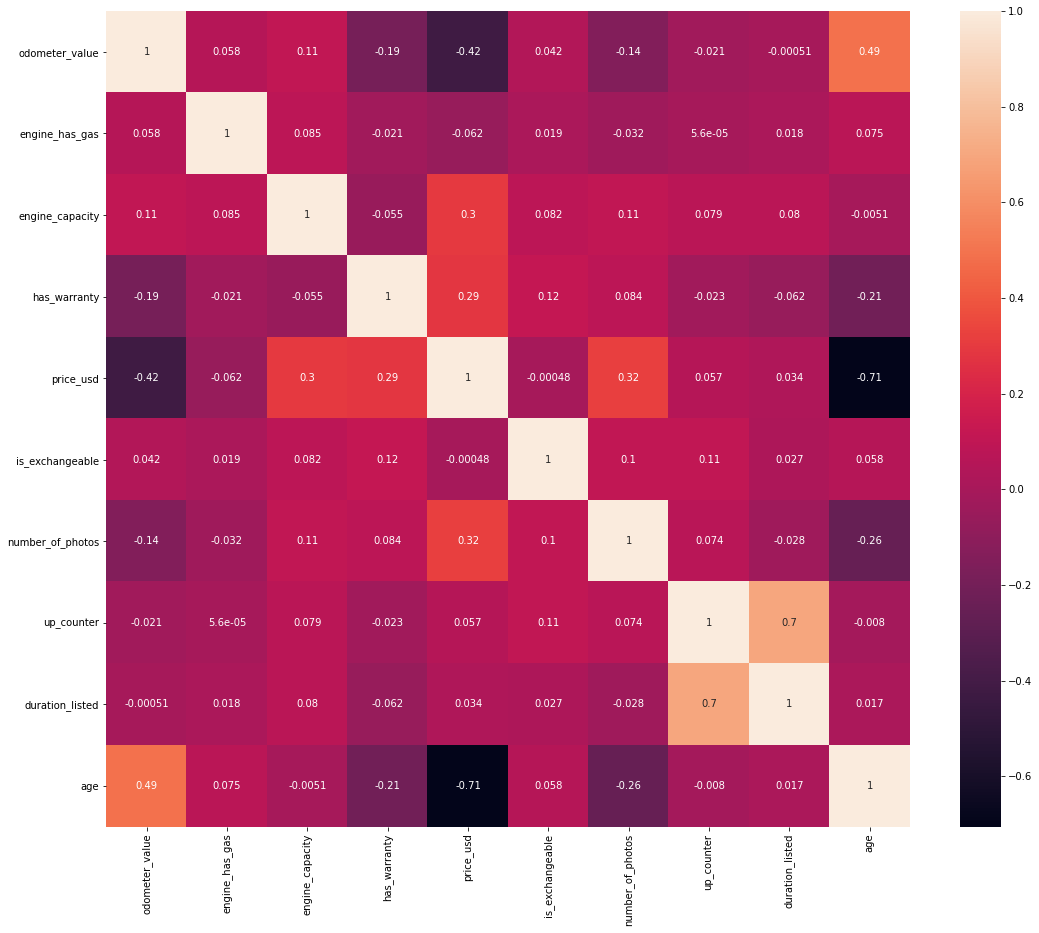

In [65]:
correlation = cars.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(correlation, annot=True)
plt.show()

___

### 1.2 - Transformation texte en one hot

Les colonnes ```['manufacturer_name','model_name','color','engine_fuel','engine_type',
'transmission','body_type','state','drivetrain','location_region'] ``` sont des String. On doit les convertir afin de pouvoir les utiliser dans nos calculs numérique.<br>
Toutes ses colonnes ont un nombre finis de valeurs unique. La plupart ne peuvent pas être hiérarchisé, une conversion en dictionnaire tel que : ["a" : 1; "b" : 2; "c" : 3] n'est donc pas viable.<br>
Nous avons plutôt opté pour une transformation en one hot, on converti une colonne en vecteur one hot puis on ajoute chacune des valeurs unique en nouvelle colonne. Pour chaque ligne on a un booleen (1 ou 0) qui indiquera si il a cette valeur (il aura donc 0 pour toutes les autres colonnes);<br> 
ex :

| fuel_essence | fuel_electrique | fuel_diesel |
| :-           | :-              | :-          |
| 0            | 1               | 0           |




In [66]:
#transforme une colonne en one hot
def texte_to_hot(X_column):  
    onehotencoder = sklearn.preprocessing.OneHotEncoder(categories='auto')
    X_column = onehotencoder.fit_transform(X_column.reshape(-1,1))
    return X_column

#ajoute une colonne transformé en one hot au data frame
#on ajoute une colonne pour chaque valeur unique 
def add_oneHot(X_data,columns_name, array_name, oneHot):
    for i in range(len(array_name)):
        array_name[i] = array_name[i].replace(" ", "_")
        X_data[columns_name+"_"+array_name[i]] = oneHot[:,i] 
    return X_data

#a partir d'un data frame recupere toutes les colonnes de texte 
#pour chacunes d'elles on les transforme en one hot et ajoute au data frame
def convert_data_oneHot(X):
    colonnes_texte = X.select_dtypes(include=['object'])
    for name in colonnes_texte.columns:
        X = X.drop(columns=[name])
        unique_name = np.unique(colonnes_texte[name])
        onehot = texte_to_hot(colonnes_texte[name].values)
        X = add_oneHot(X, name, unique_name, onehot.toarray())
    return X

___

### 1.3 - Regrouppement des modèles de voiture

In [67]:
#k est un hyper-parametre qui demande plus de test car si la cette colonne est influante on doit affiner pour 
#ne pas desequilibrer le dataset avec un model 'other_model' trop imposant
def add_model_name(X,k):
    model_names, frequency = np.unique(X['model_name'],return_counts = True)
    X['model_name'] = X['model_name'].replace(model_names[frequency < k],'other_model')
    return X

#debug print de la frequence apres la mise à jour 
#model_names, frequency = np.unique(cars['model_name'],return_counts = True)
#print(frequency)

**Quelques lignes utiles pour comprendre la conversion des données**

anciennes features sans utiliser les colonnes de texte
```python
['manufacturer_name','model_name','color','engine_fuel','engine_type',
 'transmission','body_type','state','drivetrain','location_region']
```
___

on enleve le prix car c'est notre prediction<br>
```python
features = cars.drop(columns=['price_usd'])
label = cars['price_usd']
```
on décommente l'un ou l'autre
* ```features = features.drop(columns=['model_name'])```
* ```features = add_model_name(features,100);```
___
On converti l'ensemble de nos colonnes de texte en one hot: 
```features = convert_data_oneHot(features)```
___
Permet de verifier le nombre de colonnes dans notre dataFrame <br>
```print(cars.shape)``` => (38521, 20)<br>
```print(features.shape)``` => (38521, 108)<br>
On remarque bien l'ajout des valeurs des one hot en nouvelles colonnes
___
Affichage des colonnes, on peut maintenant voir les nouvelles colonnes ajoutées<br>
```python
for i in features.columns:
    print(i)
```

___

### 1.4 Annexe - Regression linéaire sans standardisation

# TODO mettre dans standar

train error 10500151.242751325
test error 11234416.835935311


<ipython-input-68-2bbeb4397835>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


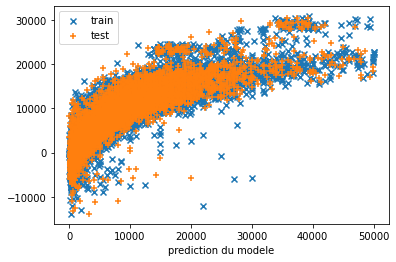

In [68]:
# Regression linéaire avant la standardisation
features = cars.copy(deep=True)
features = features.drop(columns=['price_usd'])
features = features.drop(columns=['model_name'])
label = cars['price_usd']
features = convert_data_oneHot(features)

X = features.values
Y = label.values
test_ratio = 0.30
seed = 7
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=test_ratio, random_state=seed)
alpha_etoile = 0.1
monModele = sklearn.linear_model.Ridge(alpha=alpha_etoile)
monModele.fit(X_train, Y_train)
Y_train_pred = monModele.predict(X_train)
print("train error", sklearn.metrics.mean_squared_error(Y_train_pred, Y_train))

Y_test_pred = monModele.predict(X_test)
print("test error", sklearn.metrics.mean_squared_error(Y_test_pred, Y_test))

xmin= min(Y_train.min(), Y_train_pred.min() )-1
xmax= max(Y_train.max(), Y_train_pred.max() )+1

fig = plt.figure(1)
plt.scatter(Y_train, Y_train_pred, marker='x', label='train')
plt.scatter(Y_test , Y_test_pred , marker='+', label='test')

# plt.scatter(??, ??, marker='x', label='train')
# plt.scatter(??, ??, marker='+', label='test')
plt.legend()
plt.xlabel('verite terrain')
plt.xlabel('prediction du modele') # xlabel ou ylabl: a vous de voir

ax = fig.add_subplot(111)


# TODO
faire une analyse du train et test error et expliquer pourquoi la standardisation est necessaire

___

## 2 - Standardisation

# TODO
expliquer c'est quoi et comment on fait la standardisation

In [69]:
def standardisation(X,scaler):
    # On effectue la standardisation dans une copie
    cars_standard = X.copy(deep=True)
    cars_standard = convert_data_oneHot(cars_standard)
    cars_standard[cars_standard.columns] = scaler.fit_transform(cars_standard[cars_standard.columns])
    return cars_standard.copy(deep=True)

In [116]:
#L'ajout du nom des models n'apporte pas une meilleur precision 
# et rallonge considerablement le temps de calcul on choisi donc de l'enlever
#Dans le cas où l'on veut les garder on dispose d'une fonction pour regroupper les model ayant moins de k lignes
#k = 10
#cars_standard = add_model_name(cars_standard,k);
cars = cars.drop(columns=['model_name'])
scaler = MinMaxScaler()
# On effectue la standardisation dans une copie
cars_standard = cars.copy(deep=True)
cars_standard = convert_data_oneHot(cars_standard)
cars_standard[cars_standard.columns] = scaler.fit_transform(cars_standard[cars_standard.columns])



KeyError: "['model_name'] not found in axis"

In [117]:
cars_standard.head()

,odometer_value,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed,age,...,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear,location_region_Брестская_обл.,location_region_Витебская_обл.,location_region_Гомельская_обл.,location_region_Гродненская_обл.,location_region_Минская_обл.,location_region_Могилевская_обл.
0,0.19000,0.00000,0.29487,0.00000,0.21798,0.00000,0.09412,0.00645,0.00717,0.11688,...,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
1,0.29000,0.00000,0.35897,0.00000,0.09998,1.00000,0.12941,0.02849,0.03719,0.22078,...,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
2,0.40200,0.00000,0.29487,0.00000,0.05598,1.00000,0.03529,0.03817,0.06765,0.23377,...,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
3,0.01000,0.00000,0.35897,0.00000,0.19996,1.00000,0.09412,0.02204,0.03853,0.25974,...,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
4,0.28000,0.00000,0.29487,0.00000,0.04266,1.00000,0.15294,0.00323,0.00314,0.23377,...,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000


___

# 3 - Modèles

### Split Train Test

In [118]:
#je pop au lieu de selectionner les colonnes directement car on conserve le format pandas
Y = cars_standard.pop('price_usd')
X = cars_standard
test_ratio = 0.3
train_ratio = 0.7
#toto a definir seed
seed = 42

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=test_ratio, random_state=seed)


In [119]:
#Fonction permettant de visualiser simplement nos données pred vs test d'un model
def plot_pred(X_train,X_test,Y_train,Y_test,model):
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    print("train error", sklearn.metrics.mean_squared_error(Y_train_pred, Y_train))
    print("test error", sklearn.metrics.mean_squared_error(Y_test_pred, Y_test))

    xmin= min(Y_train.min(), Y_train_pred.min() )-1
    xmax= max(Y_train.max(), Y_train_pred.max() )+1

    fig = plt.figure(1)
    plt.scatter(Y_train, Y_train_pred, marker='x', label='train')
    plt.scatter(Y_test , Y_test_pred , marker='+', label='test')

    plt.legend()
    plt.xlabel('verite terrain')
    plt.xlabel('prediction du modele')

    ax = fig.add_subplot(111)


## 3.1 - Régression linéaire 

In [120]:
#on fit seulement alpha,les autres param ayant été testé et n'ayant aucunes influences remarquables
ridge = sklearn.linear_model.Ridge()
parameters = {'alpha' : [1,0.1,0.01,0.001,0.0001]}

alpha = [0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000]
gs = GridSearchCV(estimator=ridge, param_grid=parameters,cv=5,n_jobs=-1, verbose=1)

gs.fit(X_train, Y_train)

#meilleur score avec un fit des hyper-paramètres données
print(gs.best_score_)
#paramètres associers à ce score
print(gs.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.7393588239133632
{'alpha': 1}


In [121]:
#on recupère les meilleurs paramètres, ici seulement alpha
bp = gs.best_params_

#on peut maintenant refaire notre modele 
ridge = sklearn.linear_model.Ridge( alpha=bp['alpha'])
ridge.fit(X_train, Y_train)

print("lineaire",ridge.score(X_test,Y_test))

lineaire 0.736939589803238


train error 0.0041996236253025515
test error 0.004486791469140791


<ipython-input-119-47eb9cd32cb3>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


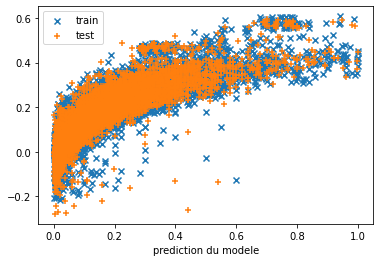

In [122]:
#on observe notre prediction
plot_pred(X_train,X_test,Y_train,Y_test,ridge)

# TODO
le modele marche pas tres bien donc on change

# TODO
faire un petit commentaire sur le resultat et la methode

___

## 3.2 - Random Forest

# TODO
c'est quoi, comment ça marche et pourquoi on fait ça
expliquer le score, à quoi ça correspond etc
comparer les deux modeles


### Pourquoi Random Forest


How the Random Forest Algorithm Works

The following are the basic steps involved in performing the random forest algorithm:

    Pick N random records from the dataset.
    Build a decision tree based on these N records.
    Choose the number of trees you want in your algorithm and repeat steps 1 and 2.
    In case of a regression problem, for a new record, each tree in the forest predicts a value for Y (output). The final value can be calculated by taking the average of all the values predicted by all the trees in forest. Or, in case of a classification problem, each tree in the forest predicts the category to which the new record belongs. Finally, the new record is assigned to the category that wins the majority vote.

Advantages of using Random Forest

As with any algorithm, there are advantages and disadvantages to using it. In the next two sections we'll take a look at the pros and cons of using random forest for classification and regression.

    The random forest algorithm is not biased, since, there are multiple trees and each tree is trained on a subset of data. Basically, the random forest algorithm relies on the power of "the crowd"; therefore the overall biasedness of the algorithm is reduced.
    This algorithm is very stable. Even if a new data point is introduced in the dataset the overall algorithm is not affected much since new data may impact one tree, but it is very hard for it to impact all the trees.
    The random forest algorithm works well when you have both categorical and numerical features.
    The random forest algorithm also works well when data has missing values or it has not been scaled well (although we have performed feature scaling in this article just for the purpose of demonstration).

Disadvantages of using Random Forest

    A major disadvantage of random forests lies in their complexity. They required much more computational resources, owing to the large number of decision trees joined together.
    Due to their complexity, they require much more time to train than other comparable algorithms.

Throughout the rest of this article we will see how Python's Scikit-Learn library can be used to implement the random forest algorithm to solve regression, as well as classification, problems.


#### What is GridSearchCV?

First, let us understand what is grid search? It is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. As mentioned above, the performance of a model significantly depends on the value of hyperparameters. Note that there is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values. Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters.

GridSearchCV is a function that comes in Scikit-learn’s(or SK-learn) model_selection package.So an important point here to note is that we need to have Scikit-learn library installed on the computer. This function helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, we can select the best parameters from the listed hyperparameters.

In [203]:

#les params sont à regler pour le meilleur resultat
rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [1,5,1]
              , "min_samples_split" : [1,10,1]
              , "max_depth": [10]
              , "n_estimators": [100]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,n_jobs=-1, verbose=1)
gs = gs.fit(X_train, Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/home/alexandre/Documents/python/IAS/jupyter/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.88652191        nan        nan 0.8834849         nan
        nan 0.88567162        nan]
  warnings.warn(


In [204]:
#Affichage des meilleurs parametres et le score associé 
print(gs.best_score_)
print(gs.best_params_)
#juste virer les nan
#print(gs.cv_results_)



0.8865219063675243
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [205]:
#on recommence avec les meilleurs params trouvées 
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
forest.fit(X_train, Y_train)

Y_train_pred = forest.predict(X_train)
print("train error", sklearn.metrics.mean_squared_error(Y_train_pred, Y_train))

Y_test_pred = forest.predict(X_test)
print("test error", sklearn.metrics.mean_squared_error(Y_test_pred, Y_test))

print('Score: %.2f' % forest.score(X_test, Y_test))

train error 0.0012058461000196642
test error 0.0018502506802066312
Score: 0.89


In [126]:
#on change les options d'affichage de pandas
#permet de print autant de ligne que l'on veut
pd.set_option('display.max_rows', None)
#format de float plus lisible : 123456.e-1 => 0.12345
pd.options.display.float_format = '{:.5f}'.format

In [127]:
#print les colonnes les plus influentes  

#on transpose afin d'avoir une meilleur lisibilité
important_features = pd.DataFrame(data=[X_train.columns,forest.feature_importances_]).T
#rename des colonnes
important_features = important_features.rename(columns={0: "Feature", 1: "Influence"})
#tri sur l'influence
important_features.sort_values(by=['Influence'],ascending=False,inplace=True)
#option de pandas pour un affichage plus joli, on masque l'index
important_features.style.hide_index()

Feature,Influence
age,0.671639
drivetrain_front,0.123905
engine_capacity,0.095042
odometer_value,0.028986
transmission_mechanical,0.007564
body_type_minibus,0.006028
transmission_automatic,0.004943
number_of_photos,0.004599
engine_fuel_gasoline,0.004067
duration_listed,0.003860


In [128]:
#on peut tester le score sur ce
#faire les predicts et comparer les preds en fonctions des cars pour trouver des faiblesses/overfit possibles
#pour chaque voiture je calcul diff(pred,reel) (sur test ou train)

In [129]:
print("lineare",ridge.score(X_test,Y_test))
print("forest",forest.score(X_test,Y_test))

lineare 0.736939589803238
forest 0.8910507392699932


In [130]:
#on peut creer une voiture random et voir son prix

In [131]:
#on peut se poser la question de la consequence de l'util de ce model irl
#s'en servir et faire des trucs irl avec/ faire des predictions sur des trucs
#parler utilisations 
#possibles ameliorations

train error 0.0012024404053697364
test error 0.001858252305038819


<ipython-input-119-47eb9cd32cb3>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


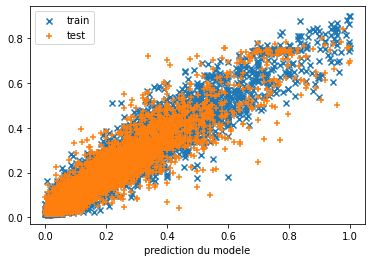

In [132]:
plot_pred(X_train,X_test,Y_train,Y_test,forest)

In [133]:
pd.set_option('display.max_rows', 50)

In [191]:
def test_pred(data, mask, model):
    filtered_cars = data.copy(deep=True)
    filtered_cars = standardisation(filtered_cars,scaler)
    filtered_cars = filtered_cars[mask]
    Y = filtered_cars.pop('price_usd')
    X = filtered_cars
    
    #sert juste si on peut la pred et test error
    X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3, random_state=31)
    
    #elles sont dans la fonction plot_pred
    #Y_train_pred = model.predict(X_train)
    #print("train error", sklearn.metrics.mean_squared_error(Y_train_pred, Y_train))
    #Y_test_pred = model.predict(X_test)
    #print("test error", sklearn.metrics.mean_squared_error(Y_test_pred, Y_test))

    print("Score du model",model.score(X,Y))
    
    #plot pour avoir une representation graphique
    plot_pred(X_train,X_test,Y_train,Y_test,model)
    
    return filtered_cars.copy(deep=True)
    

Score du model 0.6999034363841735
train error 0.000461444561154968
test error 0.0004918513552037302


<ipython-input-119-47eb9cd32cb3>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


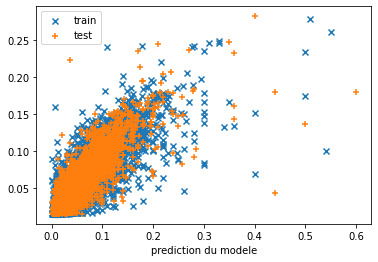

In [202]:
#Le mask est à faire sur notre dataset standardisé sinon on perd des features
#sinon le model ne fonctionnera pas

#mask = cars_standard.age < cars_standard.age.mean()
#Score du model 0.87668998856452

mask = cars_standard.age > cars_standard.age.mean()
#Score du model 0.702090016987009


data_mask = test_pred(cars,mask,forest)



In [136]:
#j'essai de pouvoir faire de meilleur comparaison là je suis bloqué sur les mask apres standardisation
#donc on peut pas vraiment mettre de valeur brut à part pour les bool
#et je ne sais pas non plus comment faire des graphiques

In [137]:
print(cars.price_usd.mean())
print(cars.price_usd.median())

6637.160884193038
4800.0


In [196]:
#on ne veux pas print les 38.000 lignes
pd.set_option('display.max_rows', 50)
pd.options.display.float_format = '{:.2f}'.format

In [201]:
cars_test = X.copy(deep=True)
price_test = Y.copy(deep=True)
cars_test.insert(4,'price_usd',price_test)
cars_test[cars_pred.columns] = scaler.inverse_transform(cars_test[cars_test.columns])
cars_test.head()

,odometer_value,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed,age,...,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear,location_region_Брестская_обл.,location_region_Витебская_обл.,location_region_Гомельская_обл.,location_region_Гродненская_обл.,location_region_Минская_обл.,location_region_Могилевская_обл.
0,190000.00,0.00,2.50,0.00,10900.00,0.00,9.00,13.00,16.00,10.00,...,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,290000.00,0.00,3.00,0.00,5000.00,1.00,12.00,54.00,83.00,18.00,...,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,402000.00,0.00,2.50,0.00,2800.00,1.00,4.00,72.00,151.00,19.00,...,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3,10000.00,0.00,3.00,0.00,9999.00,1.00,9.00,42.00,86.00,21.00,...,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,280000.00,0.00,2.50,0.00,2134.11,1.00,14.00,7.00,7.00,19.00,...,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [200]:
cars_pred = X.copy(deep=True)
price_pred = forest.predict(X)
cars_pred.insert(4,'price_usd',price_pred)
cars_pred[cars_pred.columns] = scaler.inverse_transform(cars_pred[cars_pred.columns])
cars_pred.head()

,odometer_value,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed,age,...,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear,location_region_Брестская_обл.,location_region_Витебская_обл.,location_region_Гомельская_обл.,location_region_Гродненская_обл.,location_region_Минская_обл.,location_region_Могилевская_обл.
0,190000.00,0.00,2.50,0.00,12153.84,0.00,9.00,13.00,16.00,10.00,...,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,290000.00,0.00,3.00,0.00,5956.25,1.00,12.00,54.00,83.00,18.00,...,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,402000.00,0.00,2.50,0.00,4501.46,1.00,4.00,72.00,151.00,19.00,...,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3,10000.00,0.00,3.00,0.00,5633.19,1.00,9.00,42.00,86.00,21.00,...,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,280000.00,0.00,2.50,0.00,4317.63,1.00,14.00,7.00,7.00,19.00,...,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [222]:
#on peut donc remarquer que notre model n'est pas si précis en moyenne  
np.sqrt(sklearn.metrics.mean_squared_error(cars_test.price_usd,cars_pred.price_usd))

1870.2539435507024

In [232]:
#bcp de vielle voiture pas chere alors que la moyenne du prix est 6000
#bref bcp de vvoitures pas chere, et bcp de jeunes voitures tres tres chere
#cars.price_usd.median() 4800.0
#cars[cars.age < 5].price_usd.median() 15983.24
#regarder les histos et analyser on peut conclure qu'on aurait deux separer le modele en deux, une 
#partie sur un model cher et l'autre sur les pas chere vielle
#ref prix histo prix moyen par année

# TODO
commenter resultat

___

# 4 - Analyse

## TODO pas finis

Resultat random forest avec en param

**param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [1,5,1]
              , "min_samples_split" : [1,5,1]
              , "max_depth": [10]
              , "n_estimators": [100]}**
              
Pour les deux versions la precision/score est de 0.89

Sans les modeles de voitures :

| Colonne | Influence |
| :- | :- |
age|**0.6705**|
drivetrain_front|**0.11956**|
engine_capacity|**0.09884**|
odometer_value|**0.03100**|
transmission_mechanical|**0.00713**|
body_type_minibus|**0.00588**|
transmission_automatic|**0.00559**|
number_of_photos|**0.00514**|
duration_listed|**0.00468**|
engine_fuel_gasoline|**0.00384**|
up_counter|**0.00375**|
manufacturer_name_Toyota|**0.00306**|
body_type_suv|**0.00296**|
manufacturer_name_Mercedes-Benz|**0.00282**|
manufacturer_name_Volkswagen|**0.00248**|
manufacturer_name_Audi|**0.00218**|
body_type_sedan|**0.00215**|
manufacturer_name_Renault|**0.00209**|
engine_fuel_diesel|**0.00179**|
engine_type_diesel|**0.00167**|
manufacturer_name_BMW|**0.00151**|
engine_type_gasoline|**0.00140**|
body_type_minivan|**0.00132**|
drivetrain_all|**0.00117**|
state_new|**0.00115**|
manufacturer_name_Land_Rover|**0.00109**|
manufacturer_name_ВАЗ|**0.00104**|
manufacturer_name_Nissan|**0.00101**|

Avec les modeles de voitures (avec k = 10) :

| Colonne | Influence |
| :- | :- |
age|**0.66650**|
drivetrain_front|**0.12405**|
engine_capacity|**0.08977**|
odometer_value|**0.02913**|
transmission_mechanical|**0.00652**|
model_name_other_model|**0.00548**|
transmission_automatic|**0.00542**|
body_type_minibus|**0.00420**|
number_of_photos|**0.00418**|
duration_listed|**0.00390**|
engine_fuel_gasoline|**0.00353**|
up_counter|**0.00338**|
model_name_Land_Cruiser|**0.00327**|
model_name_Rapid|**0.00281**|
body_type_suv|**0.00227**|
manufacturer_name_Volkswagen|**0.00190**|
manufacturer_name_Audi|**0.00182**|
manufacturer_name_Mercedes-Benz|**0.00170**|
engine_type_gasoline|**0.00162**|
model_name_T5_Multivan|**0.00158**|
engine_type_diesel|**0.00151**|
body_type_sedan|**0.00145**|
state_new|**0.00138**|
engine_fuel_diesel|**0.00119**|
manufacturer_name_BMW|**0.00108**|
manufacturer_name_Renault|**0.00100**|

les features les plus influentes, on remarque que other_model est dans le top avec un k = 10, c'est donc un paramettre à regler avec prudence, on economise ~400 colonnes avec k = 10.


# Mettre analyse pred_test du model ici

## [Top](#Sommaire)

### Petit exemple de presentation de code
```python
#on transpose blababla
important_features = pd.DataFrame(data=[X_train.columns,forest.feature_importances_]).T
important_features = important_features.rename(columns={0: "Feature", 1: "Influence"})
important_features.sort_values(by=['Influence'],ascending=False,inplace=True)
#option de pandas pour un affichage plus joli, on masque l'index
important_features.style.hide_index()
```